In [1]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import matplotlib.lines as mlines

C:\Users\natha\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\natha\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\natha\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [28]:
df = pd.read_csv('test.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)
df

,datetime,taxi_zone,year_month,day,week,hour,passenger_count,company
0,2022-02-01 00:00:00,24,2022-02,1,Tuesday,0,25.000000,Subway
1,2022-02-01 01:00:00,24,2022-02,1,Tuesday,1,11.000000,Subway
2,2022-02-01 02:00:00,24,2022-02,1,Tuesday,2,6.000000,Subway
3,2022-02-01 03:00:00,24,2022-02,1,Tuesday,3,6.000000,Subway
4,2022-02-01 04:00:00,24,2022-02,1,Tuesday,4,8.000000,Subway
...,...,...,...,...,...,...,...,...
1057892,2023-12-31 19:00:00,262,2023-12,31,Sunday,19,768.363636,Subway
1057893,2023-12-31 20:00:00,262,2023-12,31,Sunday,20,487.727273,Subway
1057894,2023-12-31 21:00:00,262,2023-12,31,Sunday,21,370.090909,Subway
1057895,2023-12-31 22:00:00,262,2023-12,31,Sunday,22,289.363636,Subway


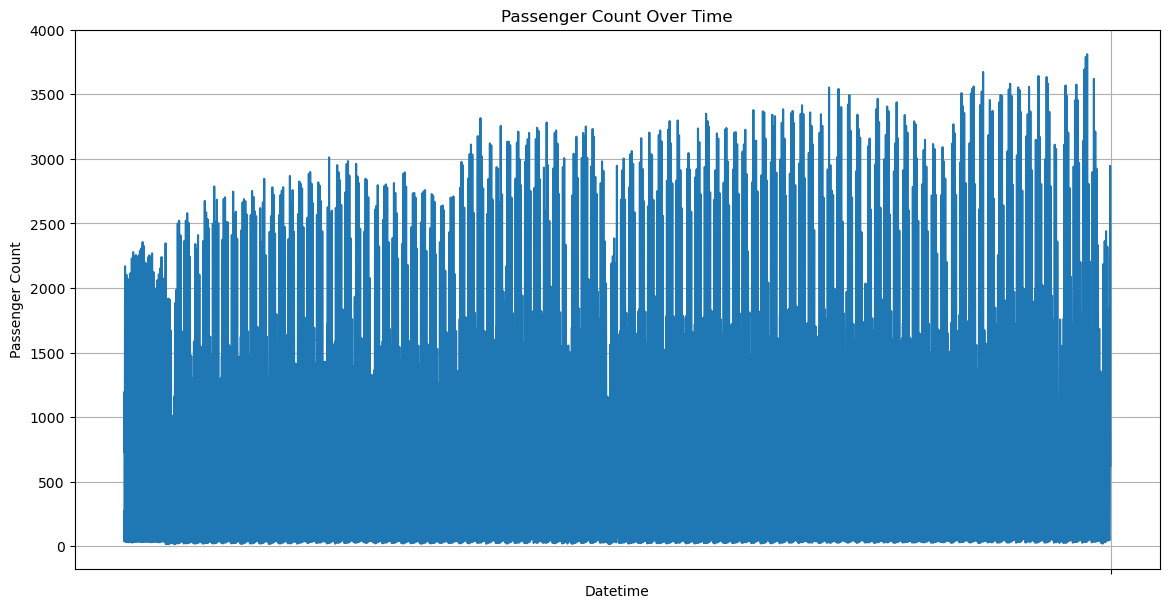

In [29]:
# 1. Passenger count over time for each company
plt.figure(figsize=(14, 7))
datetime = df['datetime'].unique()
datetime.sort()
counts_by_hour = df.groupby('datetime')['passenger_count'].median().reindex(datetime)
plt.plot(datetime, counts_by_hour)
plt.title('Passenger Count Over Time')
plt.xticks('')
plt.xlabel('Datetime')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.show()

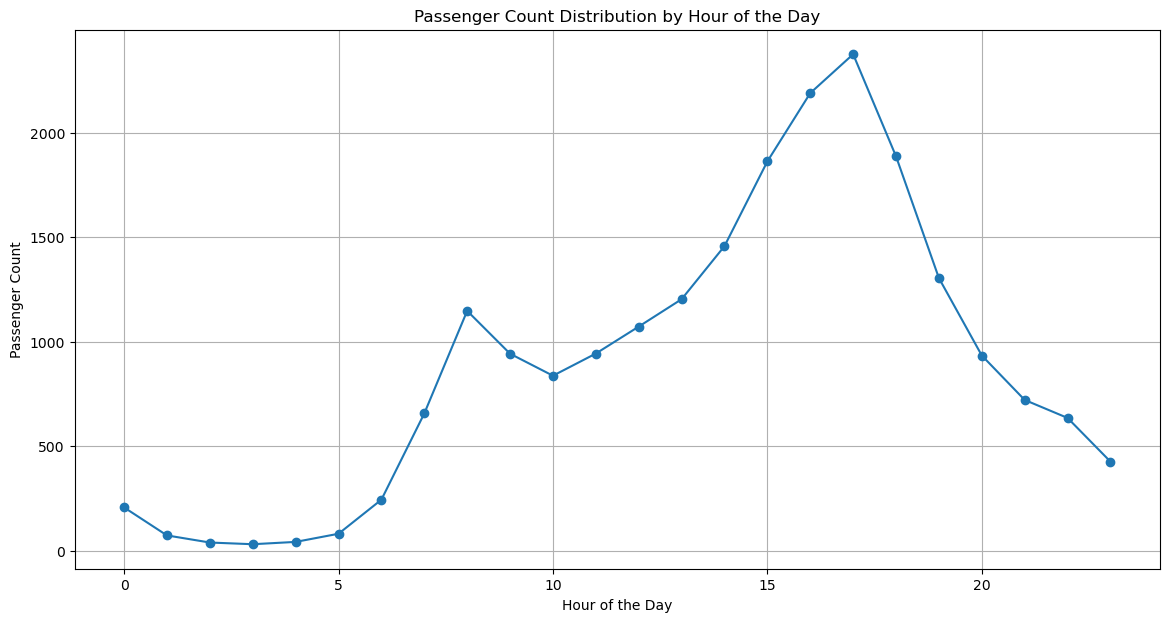

In [30]:
# 3. Passenger count distribution by hour of the day
plt.figure(figsize=(14, 7))
hours = df['hour'].unique()
hours.sort()
counts_by_hour = df.groupby('hour')['passenger_count'].median().reindex(hours)
plt.plot(hours, counts_by_hour, marker='o')
plt.title('Passenger Count Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.show()

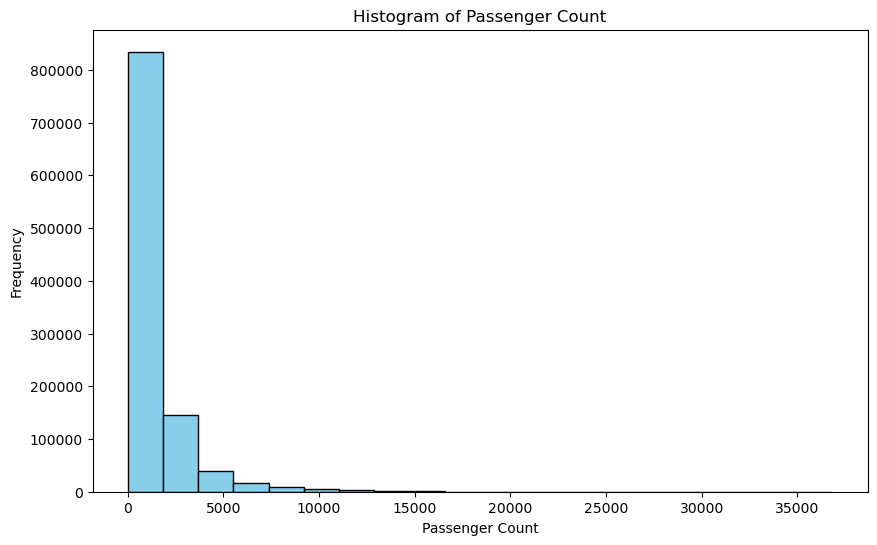

In [31]:
# 4. Histogram of Passenger Count
plt.figure(figsize=(10, 6))
plt.hist(df['passenger_count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

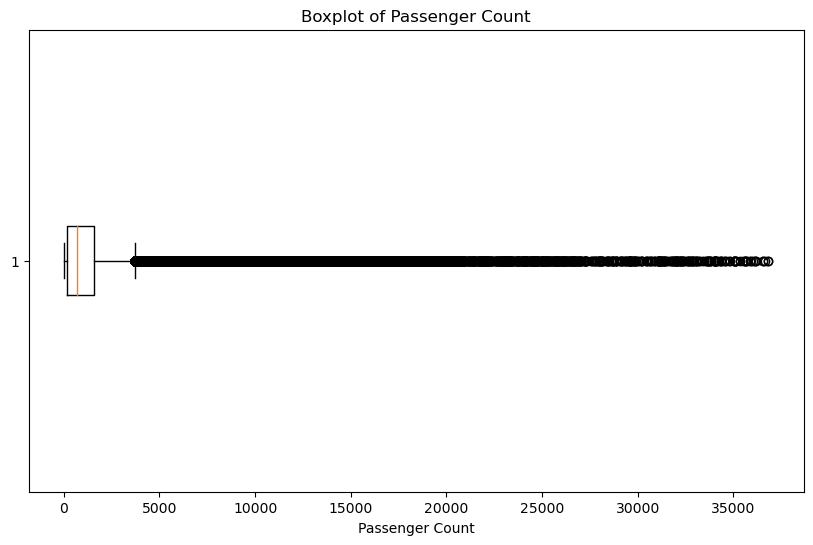

In [32]:
# 5. Boxplot of Passenger Count
plt.figure(figsize=(10, 6))
plt.boxplot(df['passenger_count'], vert=False)
plt.title('Boxplot of Passenger Count')
plt.xlabel('Passenger Count')
plt.show()

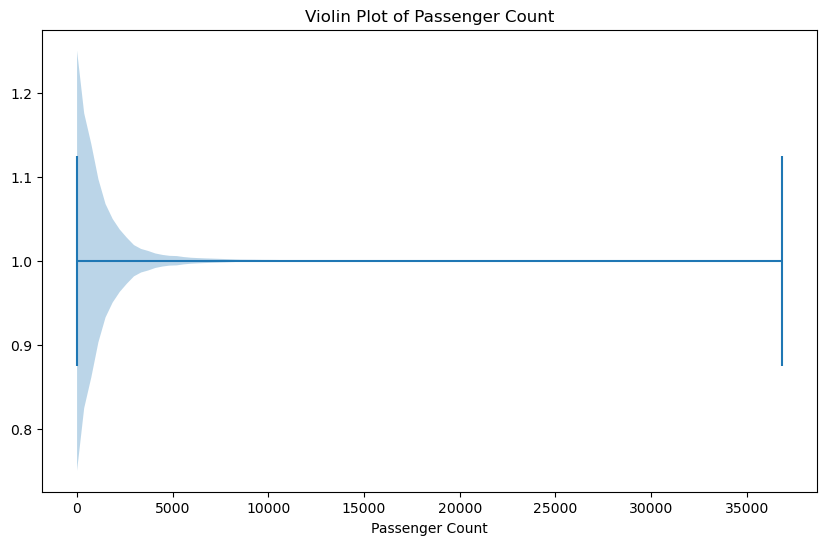

In [33]:
# 6. Violin Plot of Passenger Count
plt.figure(figsize=(10, 6))
plt.violinplot(df['passenger_count'], vert=False)
plt.title('Violin Plot of Passenger Count')
plt.xlabel('Passenger Count')
plt.show()

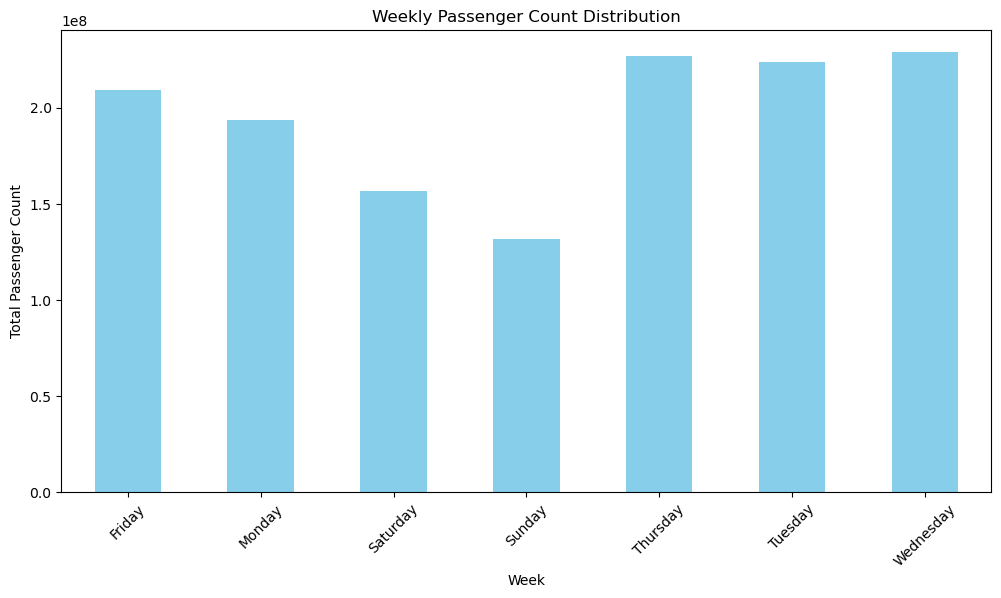

In [34]:
# 7. Weekly Passenger Count Distribution
plt.figure(figsize=(12, 6))
df.groupby('week')['passenger_count'].sum().plot(kind='bar', color='skyblue')
plt.title('Weekly Passenger Count Distribution')
plt.xlabel('Week')
plt.ylabel('Total Passenger Count')
plt.xticks(rotation=45)
plt.show()

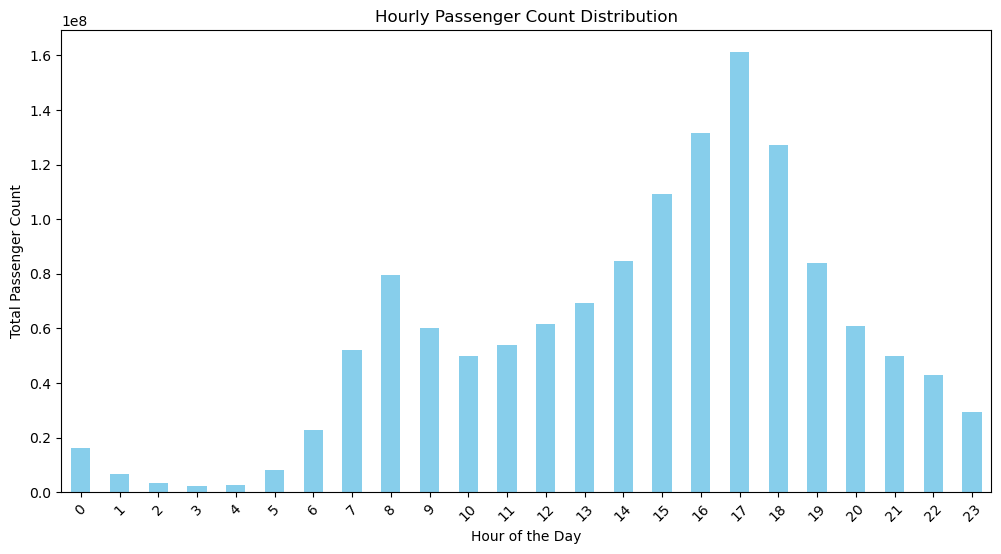

In [35]:
# 8. Hourly Passenger Count Distribution
plt.figure(figsize=(12, 6))
df.groupby('hour')['passenger_count'].sum().plot(kind='bar', color='skyblue')
plt.title('Hourly Passenger Count Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Passenger Count')
plt.xticks(rotation=45)
plt.show()

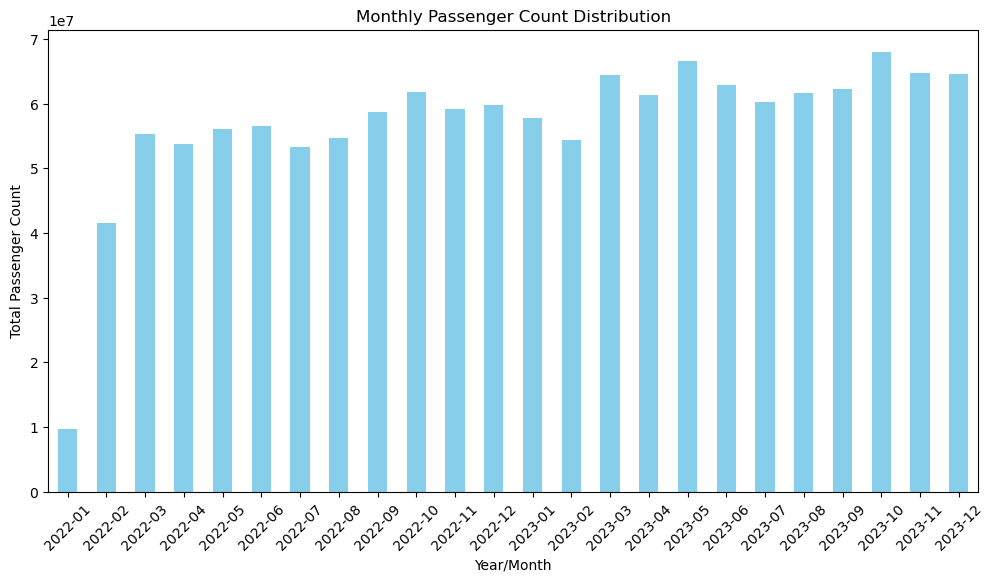

In [37]:
# 10. Monthly Passenger Count Distribution
plt.figure(figsize=(12, 6))
df.groupby('year_month')['passenger_count'].sum().plot(kind='bar', color='skyblue')
plt.title('Monthly Passenger Count Distribution')
plt.xlabel('Year/Month')
plt.ylabel('Total Passenger Count')
plt.xticks(rotation=45)
plt.show()

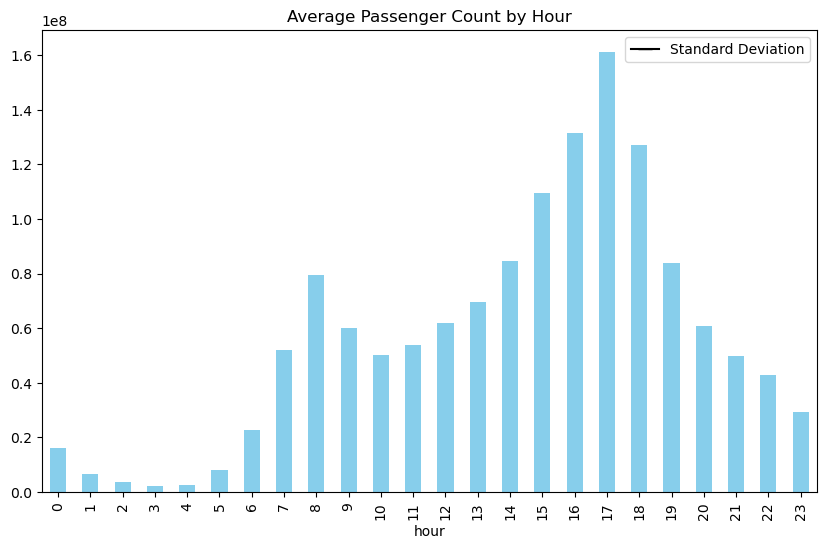

In [39]:
# Create the bar plot with error bars
plt.figure(figsize=(10,6))
df.groupby('hour')['passenger_count'].sum().plot(kind='bar', color='skyblue')

# Set the title and rotate the x-axis labels
plt.title('Average Passenger Count by Hour')
plt.xticks(rotation=90)

# Set the lower limit of y-axis to 0
plt.ylim(bottom=0)

# Create a line legend for the standard deviation
error_line = mlines.Line2D([], [], color='black', marker='_', markersize=10, label='Standard Deviation')

# Add the legend to the plot
plt.legend(handles=[error_line])

plt.show()

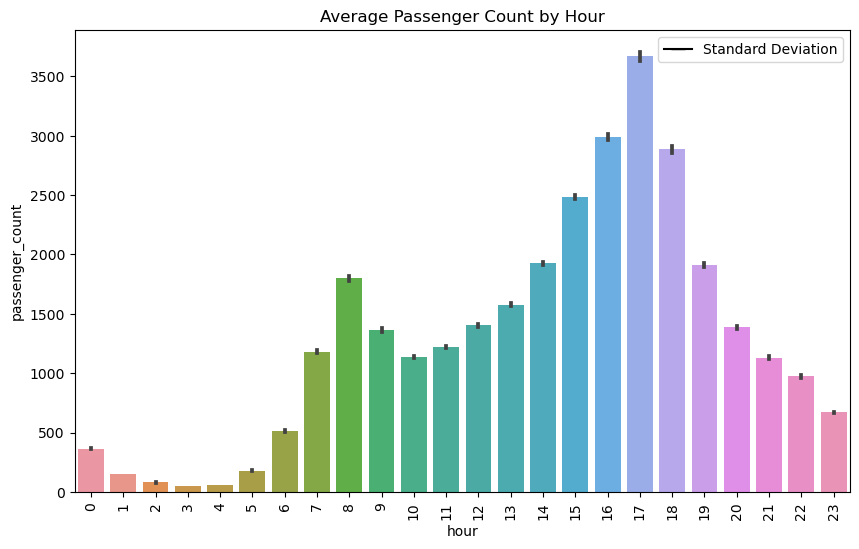

In [40]:
import matplotlib.lines as mlines

# Create the bar plot with error bars
plt.figure(figsize=(10,6))
sns.barplot(x='hour', y='passenger_count', data=df)

# Set the title and rotate the x-axis labels
plt.title('Average Passenger Count by Hour')
plt.xticks(rotation=90)

# Set the lower limit of y-axis to 0
plt.ylim(bottom=0)

# Create a line legend for the standard deviation
error_line = mlines.Line2D([], [], color='black', marker='_', markersize=10, label='Standard Deviation')

# Add the legend to the plot
plt.legend(handles=[error_line])

plt.show()

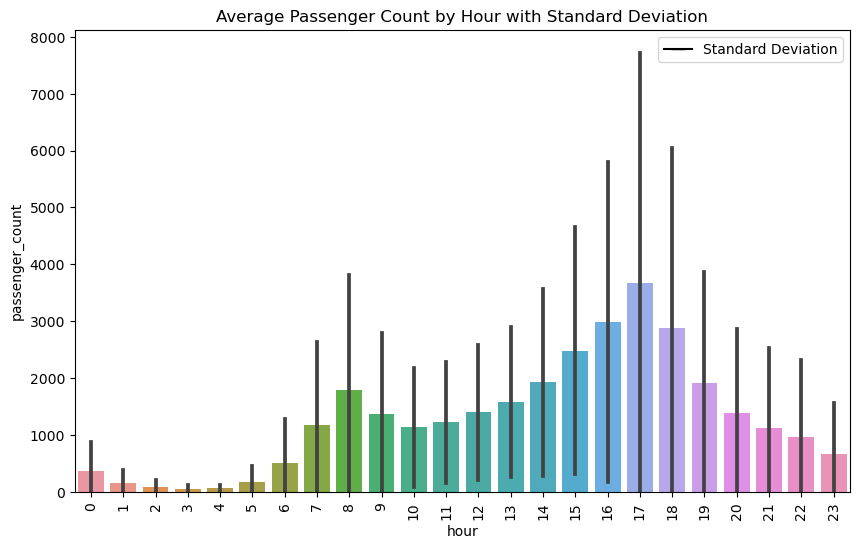

In [41]:
# Calculate the standard deviation for each hour
std_by_hour = df.groupby('hour')['passenger_count'].std()

# Create the bar plot with error bars
plt.figure(figsize=(10,6))
sns.barplot(x='hour', y='passenger_count', data=df, ci='sd')

# Set the title and rotate the x-axis labels
plt.title('Average Passenger Count by Hour with Standard Deviation')
plt.xticks(rotation=90)

# Set the lower limit of y-axis to 0
plt.ylim(bottom=0)

# Create a line legend for the standard deviation
error_line = mlines.Line2D([], [], color='black', marker='_', markersize=10, label='Standard Deviation')

# Add the legend to the plot
plt.legend(handles=[error_line])

plt.show()